# Predicting Podium Results and Points Results in the F1 Data.

In [1]:
# !pip install --quiet --upgrade pip

In [2]:
# !pip install pandas scikit-learn matplotlib seaborn xgboost lightgbm --quiet

In [3]:
# pip install --upgrade --force-reinstall scipy

In [4]:
# pip install --upgrade pandas --quiet

In [ ]:
# pip install --upgrade numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


    extract-msg (<=0.29.*)
                 ~~~~~~~^
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.14 requires protobuf<5,>=4.25.3, but you have protobuf 5.29.3 which is incompatible.
ydata-profiling 4.5.1 requires numpy<1.24,>=1.16.0, but you have numpy 2.0.2 which is incompatible.
ydata-profiling 4.5.1 requires pandas!=1.4.0,<2.1,>1.1, but you have pandas 2.3.1 which is incompatible.
ydata-profiling 4.5.1 requires pydantic<2,>=1.8.1, but you have pydantic 2.10.5 which is incompatible.
ydata-profiling 4.5.1 requires scipy<1.12,>=1.4.1, but you have scipy 1.13.1 which is incompatible.
ydata-profiling 4.5.1 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.2 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade p

   ---------------------------------------- 7.8/7.8 MB 16.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv('F1 Races 2020-2024.csv')

In [3]:
df.head()

,year,round,circuitId,date,rainy,Turns,Length,driverId,constructorId,grid,...,laps,statusId,Weighted_Top_3_Probability,Weighted_Top_3_Prob_Length,position_previous_race,nro_cond_escuderia,raceId,points,prom_points_10,Top 3 Finish
0,2000,1,1,2000-03-12,0,14,5.278,2,20,15,...,56,12,0.087719,0.090909,8.0,2,158,0.0,9.4,0
1,2000,1,1,2000-03-12,0,14,5.278,14,1,2,...,11,5,0.208333,0.222222,20.0,2,158,0.0,47.6,0
2,2000,1,1,2000-03-12,0,14,5.278,15,17,6,...,35,5,0.048387,0.083333,20.0,2,158,0.0,8.5,0
3,2000,1,1,2000-03-12,0,14,5.278,18,3,21,...,46,5,0.160494,0.235294,20.0,2,158,0.0,1.2,0
4,2000,1,1,2000-03-12,0,14,5.278,21,22,9,...,58,1,0.076923,0.100000,11.0,1,158,2.0,4.5,0


In [4]:
df.head(25)

,year,round,circuitId,date,rainy,Turns,Length,driverId,constructorId,grid,...,laps,statusId,Weighted_Top_3_Probability,Weighted_Top_3_Prob_Length,position_previous_race,nro_cond_escuderia,raceId,points,prom_points_10,Top 3 Finish
0,2000,1,1,2000-03-12,0,14,5.278,2,20,15,...,56,12,0.087719,0.090909,8.0,2,158,0.0,9.400000,0
1,2000,1,1,2000-03-12,0,14,5.278,14,1,2,...,11,5,0.208333,0.222222,20.0,2,158,0.0,47.600000,0
2,2000,1,1,2000-03-12,0,14,5.278,15,17,6,...,35,5,0.048387,0.083333,20.0,2,158,0.0,8.500000,0
3,2000,1,1,2000-03-12,0,14,5.278,18,3,21,...,46,5,0.160494,0.235294,20.0,2,158,0.0,1.200000,0
4,2000,1,1,2000-03-12,0,14,5.278,21,22,9,...,58,1,0.076923,0.100000,11.0,1,158,2.0,4.500000,0
5,2000,1,1,2000-03-12,0,14,5.278,22,6,4,...,58,1,0.322581,0.416667,3.0,2,158,6.0,39.400000,1
6,2000,1,1,2000-03-12,0,14,5.278,23,3,11,...,58,1,0.146341,0.250000,4.0,1,158,4.0,36.500000,1
7,2000,1,1,2000-03-12,0,14,5.278,25,22,14,...,58,1,0.090909,0.000000,17.0,2,158,0.0,10.500000,0
8,2000,1,1,2000-03-12,0,14,5.278,30,6,3,...,58,1,0.568627,0.400000,1.0,1,158,10.0,86.500000,1
9,2000,1,1,2000-03-12,0,14,5.278,35,16,8,...,58,1,0.033333,0.000000,7.0,1,158,3.0,9.300000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9839 entries, 0 to 9838
Data columns (total 34 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   year                                                            9839 non-null   int64  
 1   round                                                           9839 non-null   int64  
 2   circuitId                                                       9839 non-null   int64  
 3   date                                                            9839 non-null   object 
 4   rainy                                                           9839 non-null   int64  
 5   Turns                                                           9839 non-null   int64  
 6   Length                                                          9839 non-null   float64
 7   driverId                                           

In [6]:
# Set seaborn style
sns.set(style="whitegrid")

C:\Users\meher\AppData\Local\Temp/ipykernel_9292/1831809022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Top 3 Finish", data=df, ax=axes[0], palette="Set2")


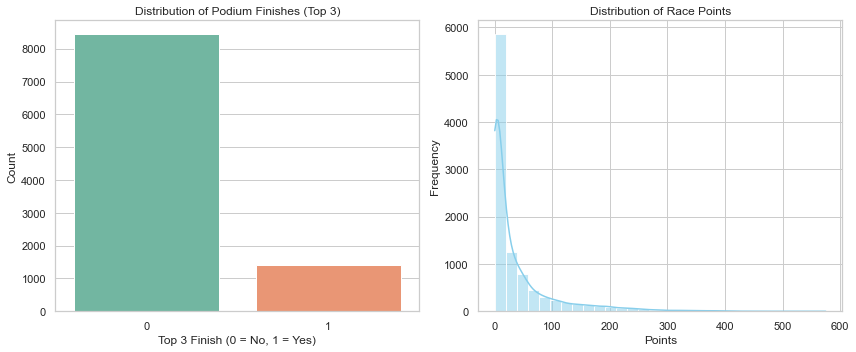

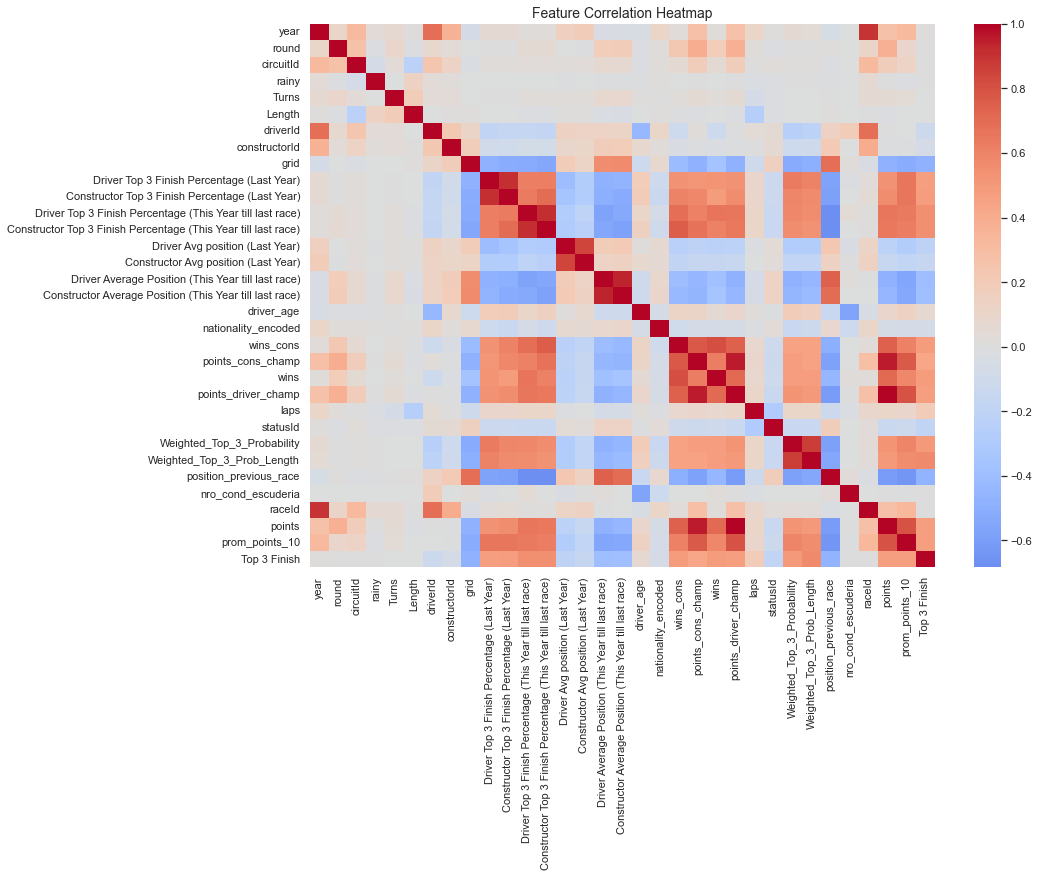

C:\Users\meher\AppData\Local\Temp/ipykernel_9292/1831809022.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="grid", y="Top 3 Finish", data=df, ci=None, palette="Blues_d")
C:\Users\meher\AppData\Local\Temp/ipykernel_9292/1831809022.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="grid", y="Top 3 Finish", data=df, ci=None, palette="Blues_d")


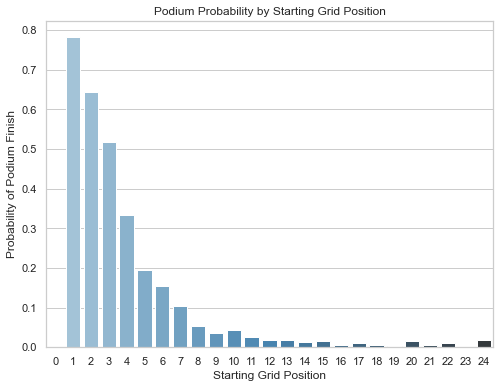

C:\Users\meher\AppData\Local\Temp/ipykernel_9292/1831809022.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Top 3 Finish", y="Weighted_Top_3_Probability", data=df, palette="Set3")


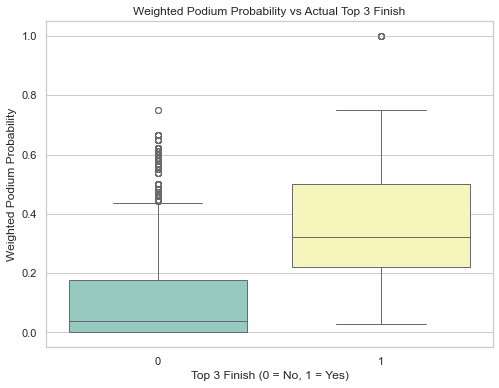

In [7]:
# ===============================================
# Step 3: Distribution of Target Variables
# ===============================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Top 3 Finish distribution
sns.countplot(x="Top 3 Finish", data=df, ax=axes[0], palette="Set2")
axes[0].set_title("Distribution of Podium Finishes (Top 3)")
axes[0].set_xlabel("Top 3 Finish (0 = No, 1 = Yes)")
axes[0].set_ylabel("Count")

# Plot Points distribution
sns.histplot(df["points"], bins=30, ax=axes[1], kde=True, color="skyblue")
axes[1].set_title("Distribution of Race Points")
axes[1].set_xlabel("Points")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# ===============================================
# Step 4: Correlation Heatmap
# ===============================================
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)  # Only numeric columns
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# ===============================================
# Step 5: Grid Position vs Podium Probability
# ===============================================
plt.figure(figsize=(8, 6))
sns.barplot(x="grid", y="Top 3 Finish", data=df, ci=None, palette="Blues_d")
plt.title("Podium Probability by Starting Grid Position")
plt.xlabel("Starting Grid Position")
plt.ylabel("Probability of Podium Finish")
plt.show()

# ===============================================
# Step 6: Weighted Podium Probability vs Actual Top 3 Finish
# ===============================================
plt.figure(figsize=(8, 6))
sns.boxplot(x="Top 3 Finish", y="Weighted_Top_3_Probability", data=df, palette="Set3")
plt.title("Weighted Podium Probability vs Actual Top 3 Finish")
plt.xlabel("Top 3 Finish (0 = No, 1 = Yes)")
plt.ylabel("Weighted Podium Probability")
plt.show()


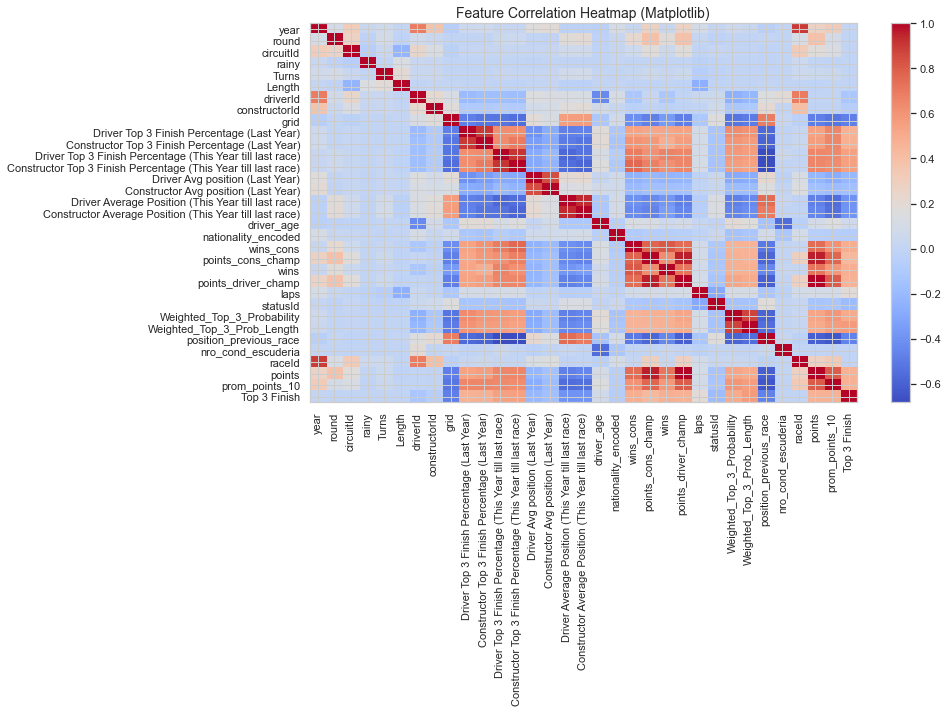

In [8]:
plt.figure(figsize=(14, 10))

# Compute correlation
corr = df.corr(numeric_only=True)

# Create heatmap
im = plt.imshow(corr, cmap="coolwarm", interpolation="nearest", aspect="auto")
plt.colorbar(im)

# Add ticks
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Title
plt.title("Feature Correlation Heatmap (Matplotlib)", fontsize=14)
plt.tight_layout()
plt.show()